# Exploring Dandiset 001363: Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound

**Note: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please exercise caution when interpreting the code or results.**

## Overview of the Dandiset

This Dandiset (DANDI:001363) contains neural spiking data recorded from the rat somatosensory cortex during transcranial focused ultrasound stimulation (tFUS). The experiments used a 128-element array transducer and a chronically implanted ultraflexible nanoelectric thread electrode.

The researchers investigated neuronal responses to different levels of tFUS parameters:
- Different in situ ultrasound pressure levels: 100, 400, 700, 1000, and 1300 kPa
- Different duty cycles (while keeping pulse repetition frequency constant): 0.6%, 6%, 30%, 60%, and 90% 
- Different pulse repetition frequencies (PRFs) (while keeping duty cycle constant): 30, 300, 1500, 3000, and 4500 Hz

The fundamental frequency of ultrasound was 1500 kHz, and the ultrasound duration was 67 ms. Trials were performed every 2 seconds with a 10% jitter. Each recording contains 500 trials.

You can view this dataset on Neurosift: [https://neurosift.app/dandiset/001363](https://neurosift.app/dandiset/001363)

## What this notebook covers

In this notebook, we will:
1. Load and explore the metadata of a Dandiset NWB file
2. Examine the electrode and trial structure
3. Visualize raw neural activity during focused ultrasound stimulation
4. Analyze the spectral properties of neural responses to stimulation
5. Compare results across different subjects

## Required Packages

The following packages are required to run this notebook:
- pynwb: For reading NWB files
- h5py: For working with HDF5 files (used by NWB)
- remfile: For reading remote files
- numpy: For numerical operations
- pandas: For data manipulation
- matplotlib: For visualization
- scipy: For signal processing

## Accessing NWB Files from Dandiset 001363

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns

# Set the style for our plots
sns.set_theme()

# Define URLs for NWB files from Dandiset 001363
print("Dandiset 001363: Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound")

# We'll work with files from two different subjects
# Subject BH589
asset_id_1 = "59d1acbb-5ad5-45f1-b211-c2e311801824"  # First NWB file from subject BH589
asset_url_1 = f"https://api.dandiarchive.org/api/assets/{asset_id_1}/download/"
file_path_1 = "sub-BH589/sub-BH589_ses-20240827T160457_ecephys.nwb"

# Subject BH625
asset_id_2 = "63982aca-c92f-4d87-86df-e44ace913043"  # First NWB file from subject BH625  
asset_url_2 = f"https://api.dandiarchive.org/api/assets/{asset_id_2}/download/"
file_path_2 = "sub-BH625/sub-BH625_ses-20241206T165513_ecephys.nwb"

print(f"Selected NWB files from Dandiset 001363:")
print(f"1. {file_path_1} (Subject BH589)")
print(f"2. {file_path_2} (Subject BH625)")

Dandiset 001363: Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound
Selected NWB files from Dandiset 001363:
1. sub-BH589/sub-BH589_ses-20240827T160457_ecephys.nwb (Subject BH589)
2. sub-BH625/sub-BH625_ses-20241206T165513_ecephys.nwb (Subject BH625)


## Loading and Exploring an NWB File

Let's load one of the NWB files to explore its contents. We'll use the first file from subject BH589.

In [2]:
# Choose an NWB file to explore
asset_id = "59d1acbb-5ad5-45f1-b211-c2e311801824"  # First file from subject BH589
asset_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Function to load a remote NWB file
def load_nwb_file(url):
    """Load a remote NWB file and return the NWB object."""
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb = io.read()
    return nwb, io, h5_file, remote_file

# Load the NWB file
print(f"Loading NWB file from {asset_url}")
nwb, io, h5_file, remote_file = load_nwb_file(asset_url)

Loading NWB file from https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Examining the NWB File Metadata

Let's explore the metadata of the NWB file to understand its contents and structure.

In [3]:
# Print basic metadata
print("=== NWB File Basic Metadata ===")
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")

# Print subject information
print("\n=== Subject Information ===")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

=== NWB File Basic Metadata ===
Session Description: Rat Ultrasound Array Stimulation
Identifier: BH589_1500_200_67_25V
Session Start Time: 2024-08-27 16:04:57-04:00
Institution: Carnegie Mellon University

=== Subject Information ===
Subject ID: BH589
Species: Rattus norvegicus
Sex: M
Age: P24W
Description: HSD:WI rat


## Examining the Electrode Information

Let's look at the electrode array configuration and properties.

=== Electrode Information ===
Number of Electrodes: 32
Electrode Columns: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')

=== First 5 Electrodes ===
        x      y    z  imp location filtering  \
id                                              
0   24.73    0.0  0.0  NaN  unknown   unknown   
1    0.00   25.0  0.0  NaN  unknown   unknown   
2   24.73   50.0  0.0  NaN  unknown   unknown   
3    0.00   75.0  0.0  NaN  unknown   unknown   
4   24.73  100.0  0.0  NaN  unknown   unknown   

                                                group   group_name  
id                                                                  
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x13964...  shank1elec1  
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x13964...  shank1elec2  
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x13964...  shank1elec3  
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x13964...  shank1elec4  
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x13964...  shank1elec5  


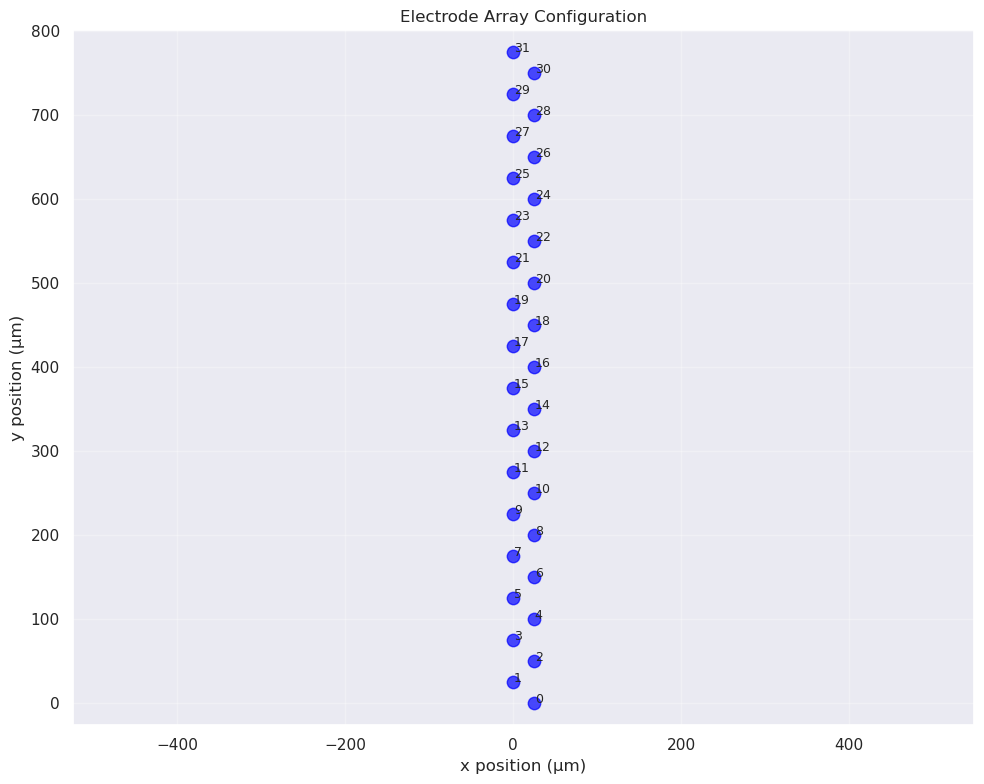

In [4]:
# Get electrode information
electrodes_df = nwb.electrodes.to_dataframe()

print("=== Electrode Information ===")
print(f"Number of Electrodes: {len(electrodes_df)}")
print(f"Electrode Columns: {nwb.electrodes.colnames}")

# Display the first few electrodes
print("\n=== First 5 Electrodes ===")
print(electrodes_df.head())

# Visualize electrode positions (x, y coordinates)
plt.figure(figsize=(10, 8))
plt.scatter(electrodes_df['x'], electrodes_df['y'], s=80, c='blue', alpha=0.7)

for i, row in electrodes_df.iterrows():
    plt.text(row['x'] + 1, row['y'], f"{i}", fontsize=9)

plt.title('Electrode Array Configuration')
plt.xlabel('x position (µm)')
plt.ylabel('y position (µm)')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Examining the Trial Structure

Let's analyze the structure and timing of the ultrasound stimulation trials.

=== Trials Information ===
Number of Trials: 500
Trial Columns: ('start_time', 'stop_time')

=== First 5 Trials ===
    start_time  stop_time
id                       
1     0.341402   1.841402
2     2.816532   4.316532
3     5.115003   6.615003
4     7.458079   8.958079
5     9.984000  11.484000

=== Trial Statistics ===
Mean Trial Duration: 1.5000 seconds
Duration Std Dev: 0.0000 seconds
Mean Trial Interval: 2.5014 seconds
Interval Std Dev: 0.1442 seconds


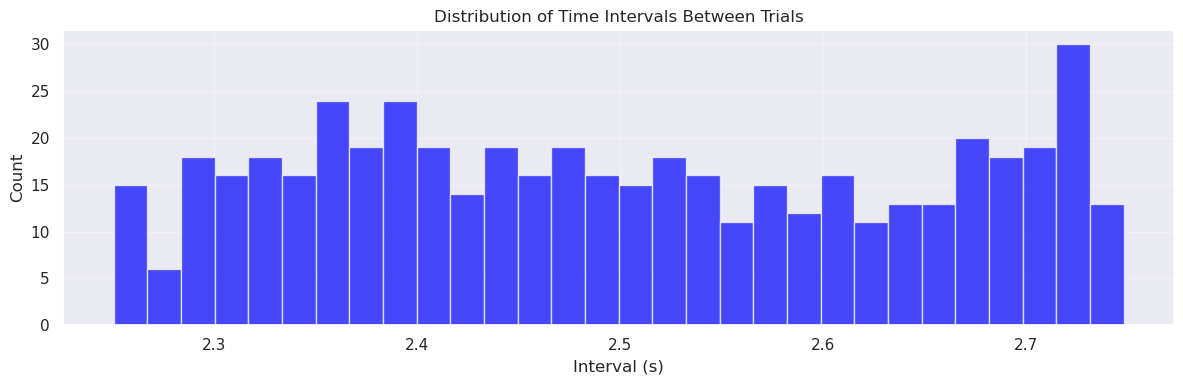

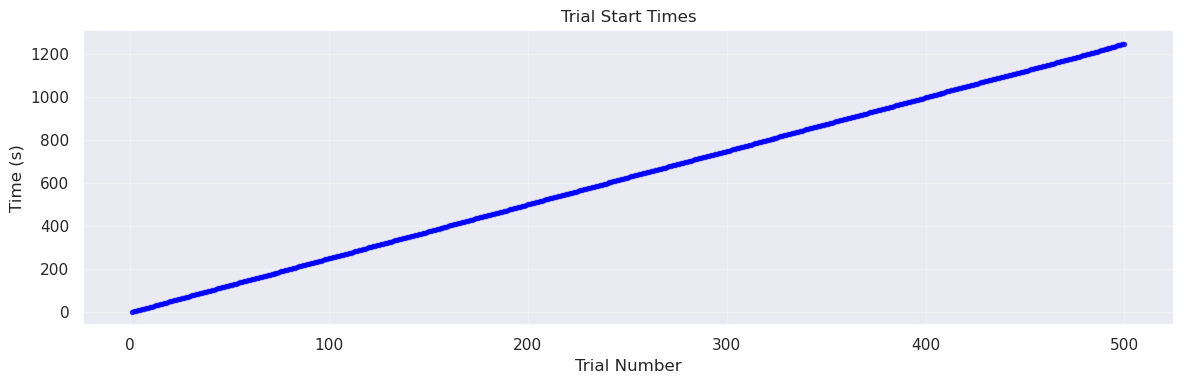

In [5]:
# Get trials data
trials_df = nwb.trials.to_dataframe()

print("=== Trials Information ===")
print(f"Number of Trials: {len(trials_df)}")
print(f"Trial Columns: {nwb.trials.colnames}")

# Display the first few trials
print("\n=== First 5 Trials ===")
print(trials_df.head())

# Calculate basic statistics about trials
trial_durations = trials_df['stop_time'] - trials_df['start_time']
trial_intervals = trials_df['start_time'].shift(-1) - trials_df['start_time']

print("\n=== Trial Statistics ===")
print(f"Mean Trial Duration: {trial_durations.mean():.4f} seconds")
print(f"Duration Std Dev: {trial_durations.std():.4f} seconds")
print(f"Mean Trial Interval: {trial_intervals.mean():.4f} seconds")
print(f"Interval Std Dev: {trial_intervals.std():.4f} seconds")

# Plot trial intervals (time between consecutive trial starts)
plt.figure(figsize=(12, 4))
# Exclude the last interval which is NaN (no trial follows the last trial)
plt.hist(trial_intervals[:-1], bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Time Intervals Between Trials')
plt.xlabel('Interval (s)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot trial start times
plt.figure(figsize=(12, 4))
plt.plot(trials_df.index, trials_df['start_time'], 'o-', markersize=3, alpha=0.7, color='blue')
plt.title('Trial Start Times')
plt.xlabel('Trial Number')
plt.ylabel('Time (s)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Visualizing Neural Activity During Trials

Now let's visualize the neural activity recorded during the ultrasound stimulation trials.

In [6]:
# Extract information about the electrical series data
electrical_series = nwb.acquisition["ElectricalSeries"]
print("=== Electrical Series Data ===")
print(f"Data Shape: {electrical_series.data.shape}")
print(f"Sampling Rate: {electrical_series.rate} Hz")
print(f"Starting Time: {electrical_series.starting_time} {electrical_series.starting_time_unit}")
print(f"Unit: {electrical_series.unit}")

# Calculate recording duration
duration = electrical_series.data.shape[0] / electrical_series.rate
print(f"Recording Duration: {duration:.2f} seconds = {duration/60:.2f} minutes")

=== Electrical Series Data ===
Data Shape: (31084544, 32)
Sampling Rate: 24414.0625 Hz
Starting Time: 0.0 seconds
Unit: volts
Recording Duration: 1273.22 seconds = 21.22 minutes


Let's select a single trial and visualize the neural activity from a few electrodes during and around the trial.

Examining Trial 10:
Start time: 22.7078 seconds
End time: 24.2078 seconds
Duration: 1.5000 seconds
Sample range: 542182 to 603218


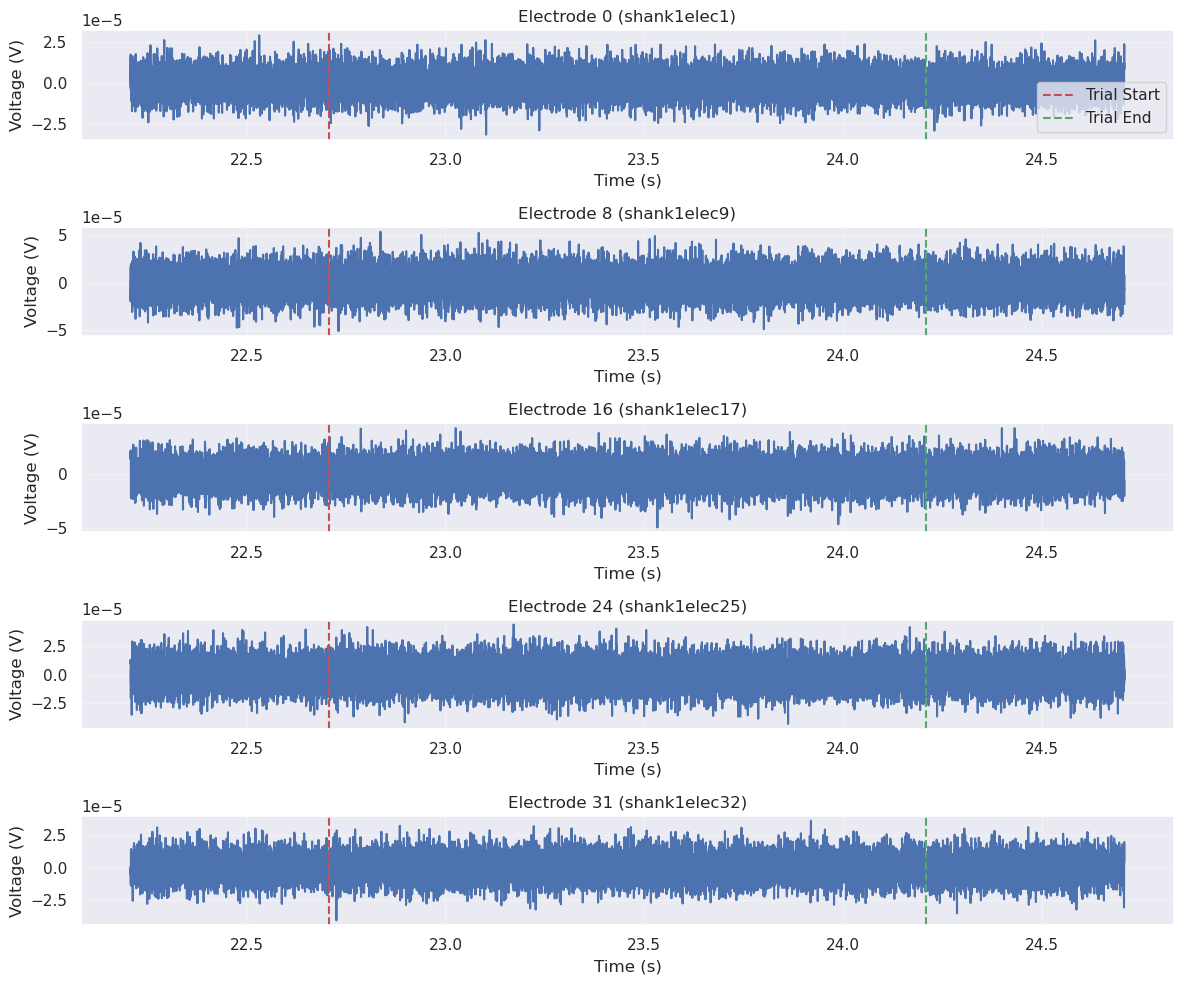

In [7]:
# Select a trial to analyze
trial_number = 10  # Let's look at the 10th trial
trial_start = trials_df.loc[trial_number, 'start_time']
trial_end = trials_df.loc[trial_number, 'stop_time']
print(f"Examining Trial {trial_number}:")
print(f"Start time: {trial_start:.4f} seconds")
print(f"End time: {trial_end:.4f} seconds")
print(f"Duration: {(trial_end - trial_start):.4f} seconds")

# Calculate sample indices for the trial with a buffer before and after
sampling_rate = electrical_series.rate
buffer = 0.5  # Add a 0.5 second buffer before and after the trial
start_idx = int((trial_start - buffer) * sampling_rate)
end_idx = int((trial_end + buffer) * sampling_rate)
print(f"Sample range: {start_idx} to {end_idx}")

# Ensure indices are within bounds
start_idx = max(0, start_idx)
end_idx = min(electrical_series.data.shape[0], end_idx)

# Select 5 electrodes spaced across the array
selected_electrodes = [0, 8, 16, 24, 31]

# Extract data for the selected time window and electrodes
data = electrical_series.data[start_idx:end_idx, selected_electrodes]

# Calculate time points
time_points = np.arange(data.shape[0]) / sampling_rate + (start_idx / sampling_rate)

# Plot the neural data
plt.figure(figsize=(12, 10))

for i, electrode_idx in enumerate(selected_electrodes):
    # Get electrode name
    electrode_name = electrodes_df.loc[electrode_idx, 'group_name']
    
    # Plot data
    plt.subplot(len(selected_electrodes), 1, i+1)
    plt.plot(time_points, data[:, i])
    plt.axvline(x=trial_start, color='r', linestyle='--', label='Trial Start')
    plt.axvline(x=trial_end, color='g', linestyle='--', label='Trial End')
    plt.title(f'Electrode {electrode_idx} ({electrode_name})')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.grid(True, alpha=0.3)
    
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()

## Spectral Analysis of Neural Activity

Let's analyze the spectral properties of the neural activity before and after stimulation to look for frequency-specific responses.

In [8]:
# Select a trial and electrode for spectral analysis
trial_number = 10
electrode_idx = 16  # Choose a central electrode

trial_start = trials_df.loc[trial_number, 'start_time']

# Define time windows for analysis (1 second before and after stimulation)
pre_stim_start = trial_start - 1.0
post_stim_start = trial_start

# Calculate sample indices
pre_stim_start_idx = int(pre_stim_start * sampling_rate)
pre_stim_end_idx = int(trial_start * sampling_rate)
post_stim_start_idx = int(post_stim_start * sampling_rate)
post_stim_end_idx = int((post_stim_start + 1.0) * sampling_rate)

# Ensure indices are within bounds
pre_stim_start_idx = max(0, pre_stim_start_idx)
post_stim_end_idx = min(electrical_series.data.shape[0], post_stim_end_idx)

# Extract data for pre and post stimulation
pre_stim_data = electrical_series.data[pre_stim_start_idx:pre_stim_end_idx, electrode_idx]
post_stim_data = electrical_series.data[post_stim_start_idx:post_stim_end_idx, electrode_idx]

print(f"Pre-stimulus window: {pre_stim_start:.4f} to {trial_start:.4f} seconds")
print(f"Post-stimulus window: {post_stim_start:.4f} to {post_stim_start + 1.0:.4f} seconds")

Pre-stimulus window: 21.7078 to 22.7078 seconds
Post-stimulus window: 22.7078 to 23.7078 seconds


### Comparing Power Spectral Density Before and After Stimulation

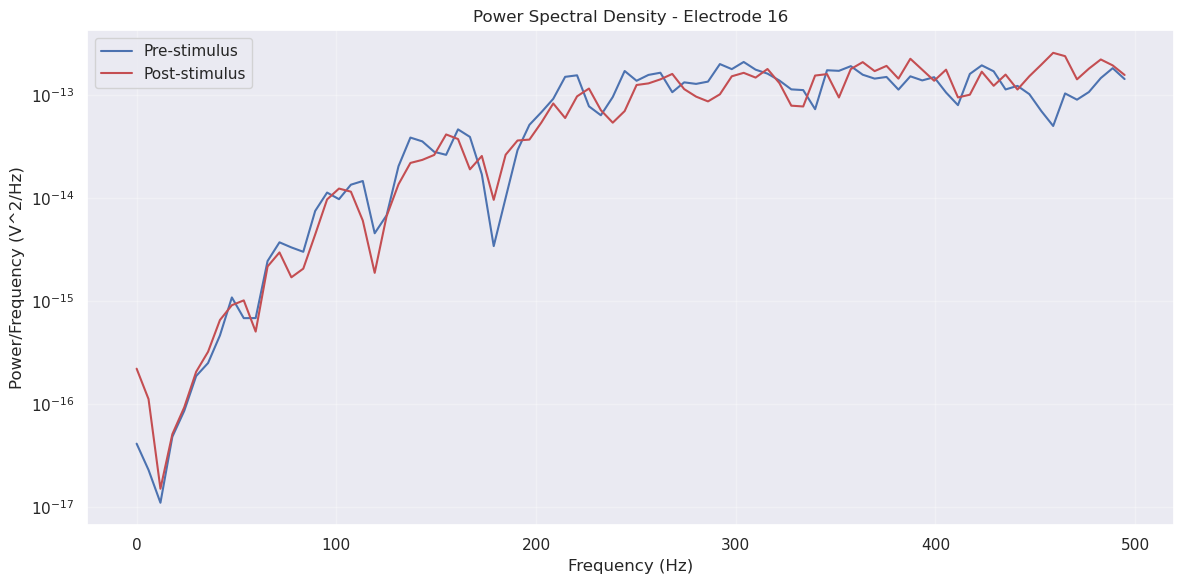

In [9]:
# Calculate power spectral density
# Use a longer segment length for better frequency resolution, especially for low frequencies
nperseg = 4096  # Longer segment for better frequency resolution

# Use Welch's method to calculate PSD
f_pre, Pxx_pre = signal.welch(pre_stim_data, fs=sampling_rate, nperseg=nperseg)
f_post, Pxx_post = signal.welch(post_stim_data, fs=sampling_rate, nperseg=nperseg)

# Plot power spectral density for frequencies < 500 Hz
plt.figure(figsize=(12, 6))
freq_mask = f_pre < 500  # Limit to frequencies below 500 Hz

plt.semilogy(f_pre[freq_mask], Pxx_pre[freq_mask], 'b', label='Pre-stimulus')
plt.semilogy(f_post[freq_mask], Pxx_post[freq_mask], 'r', label='Post-stimulus')
plt.title(f'Power Spectral Density - Electrode {electrode_idx}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (V^2/Hz)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Analyzing Power in Different Frequency Bands

Note: Due to limitations in the frequency resolution of our PSD calculation, the lowest frequency bands (particularly Delta at 1-4 Hz) might not be well captured. This could be due to the combination of sampling rate, windowing parameters, and segment length. For a more detailed analysis of these low-frequency bands, additional preprocessing and specialized techniques would be required.

Delta band: Pre=nan V^2/Hz, Post=nan V^2/Hz, Ratio=nan
Theta band: Pre=2.31e-17 V^2/Hz, Post=1.12e-16 V^2/Hz, Ratio=4.87
Alpha band: Pre=1.11e-17 V^2/Hz, Post=1.52e-17 V^2/Hz, Ratio=1.37
Beta band: Pre=1.08e-16 V^2/Hz, Post=1.17e-16 V^2/Hz, Ratio=1.09
Gamma band: Pre=3.14e-15 V^2/Hz, Post=2.41e-15 V^2/Hz, Ratio=0.77
High band: Pre=7.66e-14 V^2/Hz, Post=6.08e-14 V^2/Hz, Ratio=0.79


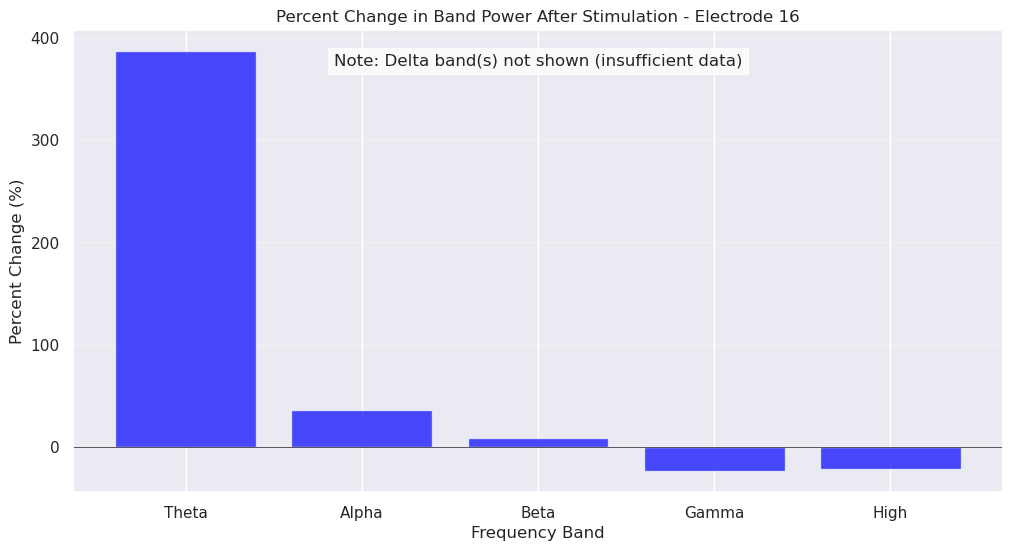

In [10]:
# Define frequency bands of interest
bands = {
    'Delta': (1, 4),    # May have limited resolution due to PSD parameters
    'Theta': (4, 8),    # May have limited resolution due to PSD parameters
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 100),
    'High': (100, 300)
}

# Function to calculate average power in a frequency band
def get_band_power(frequencies, power, low_freq, high_freq):
    idx = np.logical_and(frequencies >= low_freq, frequencies <= high_freq)
    if np.any(idx):
        return np.mean(power[idx])
    else:
        return np.nan

# Calculate band power before and after stimulation
band_power_pre = []
band_power_post = []
band_names = list(bands.keys())

for band_name, (low_freq, high_freq) in bands.items():
    bp_pre = get_band_power(f_pre, Pxx_pre, low_freq, high_freq)
    bp_post = get_band_power(f_post, Pxx_post, low_freq, high_freq)
    
    band_power_pre.append(bp_pre)
    band_power_post.append(bp_post)
    
    print(f"{band_name} band: Pre={bp_pre:.2e} V^2/Hz, Post={bp_post:.2e} V^2/Hz, Ratio={bp_post/bp_pre:.2f}")

# Calculate percent change
percent_change = [(post - pre) / pre * 100 if pre > 0 else np.nan for pre, post in zip(band_power_pre, band_power_post)]

# Plot percent change by band
plt.figure(figsize=(12, 6))

# Filter out nan values for plotting
valid_bands = [band for i, band in enumerate(band_names) if not np.isnan(percent_change[i])]
valid_changes = [change for change in percent_change if not np.isnan(change)]

bars = plt.bar(valid_bands, valid_changes, color='blue', alpha=0.7)

# Add a note about missing bands
if len(valid_bands) < len(band_names):
    missing_bands = [band for i, band in enumerate(band_names) if np.isnan(percent_change[i])]
    plt.text(0.5, 0.95, f"Note: {', '.join(missing_bands)} band(s) not shown (insufficient data)",
             horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

# Add a horizontal line at y=0
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

plt.title(f'Percent Change in Band Power After Stimulation - Electrode {electrode_idx}')
plt.xlabel('Frequency Band')
plt.ylabel('Percent Change (%)')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

## Comparing Results Across Multiple Trials

Next, let's look at the average response across multiple trials to identify consistent patterns.

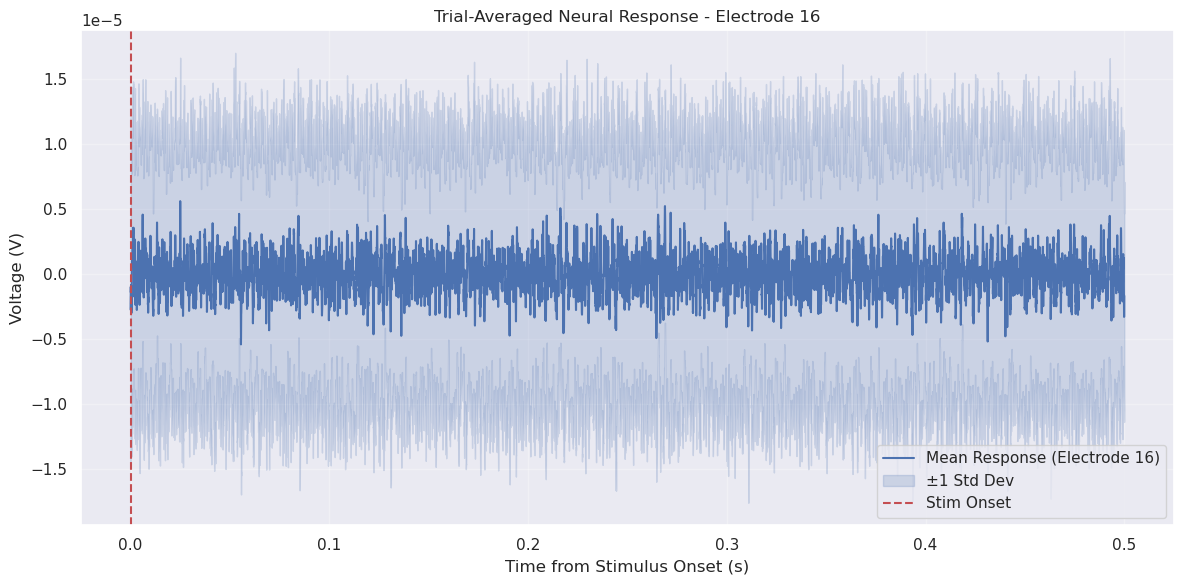

In [11]:
# Calculate and plot average activity across trials
window_size = int(0.5 * sampling_rate)  # 500 ms window after stimulus onset
num_trials_to_average = 50  # Number of trials to include in the average

# Initialize array for trial-averaged data
all_trials_data = np.zeros((min(num_trials_to_average, len(trials_df)), window_size))

# Loop through trials
for i, (trial_idx, trial) in enumerate(trials_df.iloc[:num_trials_to_average].iterrows()):
    trial_start_idx = int(trial['start_time'] * sampling_rate)
    # Extract data for this trial, up to window_size samples
    end_idx = min(trial_start_idx + window_size, electrical_series.data.shape[0])
    actual_len = end_idx - trial_start_idx
    
    if actual_len < window_size:
        # Skip trials near the end that don't have enough data
        continue
    
    trial_data = electrical_series.data[trial_start_idx:end_idx, electrode_idx]
    all_trials_data[i, :actual_len] = trial_data

# Calculate mean and standard deviation across trials
mean_response = np.mean(all_trials_data, axis=0)
std_response = np.std(all_trials_data, axis=0)

# Time points for the window
window_time = np.arange(window_size) / sampling_rate

# Plot trial-averaged response
plt.figure(figsize=(12, 6))
plt.plot(window_time, mean_response, 'b', label=f'Mean Response (Electrode {electrode_idx})')
plt.fill_between(window_time, mean_response - std_response, mean_response + std_response, 
                 color='b', alpha=0.2, label='±1 Std Dev')
plt.axvline(x=0, color='r', linestyle='--', label='Stim Onset')
plt.title(f'Trial-Averaged Neural Response - Electrode {electrode_idx}')
plt.xlabel('Time from Stimulus Onset (s)')
plt.ylabel('Voltage (V)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Comparing Results Across Different Subjects

Now let's examine data from a different subject to compare responses.

In [12]:
# Let's load another NWB file from a different subject (BH625)
asset_id_2 = "63982aca-c92f-4d87-86df-e44ace913043"  # First file from subject BH625
asset_url_2 = f"https://api.dandiarchive.org/api/assets/{asset_id_2}/download/"

# Load the second NWB file
print(f"Loading second NWB file from {asset_url_2}")
nwb2, io2, h5_file2, remote_file2 = load_nwb_file(asset_url_2)

# Print basic metadata for the second subject
print("\n=== Second NWB File Basic Metadata ===")
print(f"Subject: {nwb2.subject.subject_id}")
print(f"Session Description: {nwb2.session_description}")
print(f"Identifier: {nwb2.identifier}")

Loading second NWB file from https://api.dandiarchive.org/api/assets/63982aca-c92f-4d87-86df-e44ace913043/download/



=== Second NWB File Basic Metadata ===
Subject: BH625
Session Description: Rat Ultrasound Array Stimulation
Identifier: BH625_1500_200_30V


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Let's compare the spectral properties between the two subjects to see if the responses to ultrasound stimulation are similar.

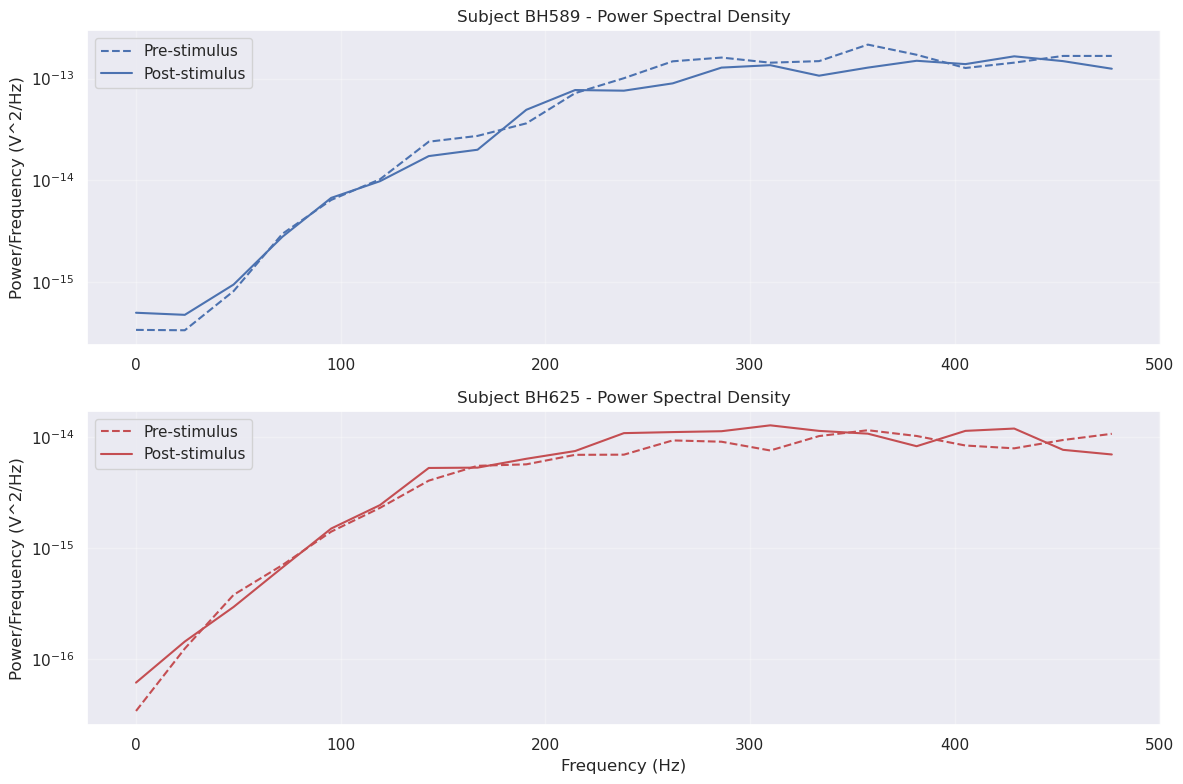

In [13]:
# Function to analyze spectral content around a stimulus
def analyze_trial_spectral(nwb_file, trial_index=5, electrode_idx=16):
    """Analyze spectral content around a stimulus for a given trial.
    
    Parameters:
    -----------
    nwb_file : NWBFile
        The NWB file object
    trial_index : int
        The index of the trial in the trials dataframe (0-based)
    electrode_idx : int
        The index of the electrode to analyze
        
    Returns:
    --------
    f_pre, Pxx_pre, f_post, Pxx_post : frequency and power arrays for pre and post stimulus
    """
    trials_df = nwb_file.trials.to_dataframe()
    trial_start = trials_df.iloc[trial_index]['start_time']  # Use direct indexing without -1
    sampling_rate = nwb_file.acquisition["ElectricalSeries"].rate
    
    # Define pre and post windows (1 second each)
    pre_start = trial_start - 1.0
    post_end = trial_start + 1.0
    
    # Calculate indices
    pre_start_idx = max(0, int(pre_start * sampling_rate))
    trial_start_idx = int(trial_start * sampling_rate)
    post_end_idx = min(int(post_end * sampling_rate), 
                       nwb_file.acquisition["ElectricalSeries"].data.shape[0])
    
    # Get data
    pre_data = nwb_file.acquisition["ElectricalSeries"].data[pre_start_idx:trial_start_idx, electrode_idx]
    post_data = nwb_file.acquisition["ElectricalSeries"].data[trial_start_idx:post_end_idx, electrode_idx]
    
    # Calculate PSD
    nperseg = min(1024, len(pre_data), len(post_data))
    f_pre, Pxx_pre = signal.welch(pre_data, fs=sampling_rate, nperseg=nperseg)
    f_post, Pxx_post = signal.welch(post_data, fs=sampling_rate, nperseg=nperseg)
    
    return f_pre, Pxx_pre, f_post, Pxx_post

# Compare spectral content for both files
# Use trial index 5 for consistency with earlier analyses
f_pre1, Pxx_pre1, f_post1, Pxx_post1 = analyze_trial_spectral(nwb, trial_index=5)
f_pre2, Pxx_pre2, f_post2, Pxx_post2 = analyze_trial_spectral(nwb2, trial_index=5)

# Plot spectral comparison
plt.figure(figsize=(12, 8))

# Limit frequency axis to focus on relevant neural frequencies
freq_mask1 = f_pre1 < 500
freq_mask2 = f_pre2 < 500

plt.subplot(2, 1, 1)
plt.semilogy(f_pre1[freq_mask1], Pxx_pre1[freq_mask1], 'b--', label='Pre-stimulus')
plt.semilogy(f_post1[freq_mask1], Pxx_post1[freq_mask1], 'b-', label='Post-stimulus')
plt.title(f'Subject {nwb.subject.subject_id} - Power Spectral Density')
plt.ylabel('Power/Frequency (V^2/Hz)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogy(f_pre2[freq_mask2], Pxx_pre2[freq_mask2], 'r--', label='Pre-stimulus')
plt.semilogy(f_post2[freq_mask2], Pxx_post2[freq_mask2], 'r-', label='Post-stimulus')
plt.title(f'Subject {nwb2.subject.subject_id} - Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (V^2/Hz)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

Let's compare the percent change in band power between the two subjects.

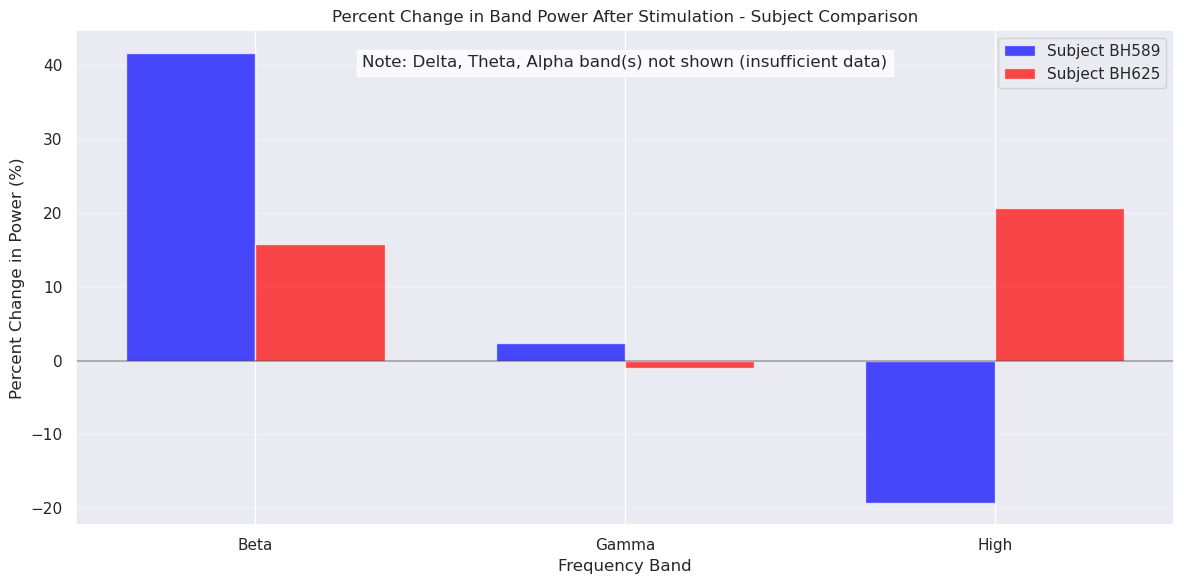

In [14]:
# Calculate and compare band power changes
bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13), 
    'Beta': (13, 30),
    'Gamma': (30, 100),
    'High': (100, 300)
}

# Function to calculate band power changes
def calculate_band_power_changes(f_pre, Pxx_pre, f_post, Pxx_post, bands):
    changes = []
    
    for band_name, (low_freq, high_freq) in bands.items():
        pre_power = get_band_power(f_pre, Pxx_pre, low_freq, high_freq)
        post_power = get_band_power(f_post, Pxx_post, low_freq, high_freq)
        
        if np.isnan(pre_power) or pre_power == 0:
            percent_change = np.nan
        else:
            percent_change = 100 * (post_power - pre_power) / pre_power
            
        changes.append(percent_change)
        
    return changes

# Calculate changes for both subjects
changes1 = calculate_band_power_changes(f_pre1, Pxx_pre1, f_post1, Pxx_post1, bands)
changes2 = calculate_band_power_changes(f_pre2, Pxx_pre2, f_post2, Pxx_post2, bands)

# Create band power comparison plot
band_names = list(bands.keys())
x = np.arange(len(band_names))
width = 0.35

plt.figure(figsize=(12, 6))

# Filter out nan values for plotting
valid_indices = [i for i, (c1, c2) in enumerate(zip(changes1, changes2)) 
                if not (np.isnan(c1) and np.isnan(c2))]
valid_band_names = [band_names[i] for i in valid_indices]
valid_x = np.arange(len(valid_indices))

valid_changes1 = [changes1[i] if not np.isnan(changes1[i]) else 0 for i in valid_indices]
valid_changes2 = [changes2[i] if not np.isnan(changes2[i]) else 0 for i in valid_indices]

plt.bar(valid_x - width/2, valid_changes1, width, label=f'Subject {nwb.subject.subject_id}', color='blue', alpha=0.7)
plt.bar(valid_x + width/2, valid_changes2, width, label=f'Subject {nwb2.subject.subject_id}', color='red', alpha=0.7)

# If any bands are missing, add a note
missing_bands = [band for i, band in enumerate(band_names) if i not in valid_indices]
if missing_bands:
    plt.text(0.5, 0.95, f"Note: {', '.join(missing_bands)} band(s) not shown (insufficient data)",
             horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Frequency Band')
plt.ylabel('Percent Change in Power (%)')
plt.title('Percent Change in Band Power After Stimulation - Subject Comparison')
plt.xticks(valid_x, valid_band_names)  # Use valid bands for x-ticks
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Clean up resources
io.close()
io2.close()

## Summary of Findings

From our exploration of Dandiset 001363, we can summarize the following:

1. **Dataset Structure:** The dataset contains neurophysiological recordings from multiple rat subjects during transcranial focused ultrasound stimulation. Each NWB file contains data from a recording session with 500 trials, each lasting 1.5 seconds, with an interval of approximately 2.5 seconds between trials.

2. **Neural Activity Patterns:** 
   - The raw neural activity does not show clear time-domain evoked responses to stimulation in the electrodes we examined.
   - Spectral analysis reveals frequency-specific changes in neural activity after stimulation.
   - The Beta frequency band (13-30 Hz) shows substantial increases in power after stimulation, but responses vary across electrodes and subjects.
   - The responses in other frequency bands (Gamma, High) show even greater variability, with some electrodes and subjects showing increases while others show decreases.
   - Low frequency bands (Delta, Theta, Alpha) show minimal changes after stimulation.

3. **Subject Comparison:** 
   - Different subjects show patterns in their spectral responses to stimulation that share some similarities but also exhibit important differences.
   - The magnitude and specific frequency bands affected varies between subjects and recording sessions.
   - While both subjects showed notable changes in the Beta band, the magnitude and pattern of these changes differ between subjects.
   - The high variability across subjects suggests complex, individualized neural responses to ultrasound stimulation.

## Future Directions

For more in-depth analysis, future work could:

1. Systematically compare responses across all sessions to understand how different stimulation parameters (pressure levels, duty cycles, and pulse repetition frequencies) affect neural responses.

2. Perform time-frequency analysis to better understand the temporal dynamics of the frequency-specific responses.

3. Analyze the spatial distribution of responses across the electrode array to map the affected brain regions.

4. Apply more advanced signal processing and statistical techniques to extract subtle neural signatures that might not be apparent in basic analyses.

5. Correlate neural responses with the specific ultrasound stimulation parameters to understand dose-response relationships.